In [83]:
import numpy as np
import pandas as pd

# Step -1: Business Problem
- Detail Analytical Report on given data

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# step 2.1 Load the Data

In [85]:
df = pd.read_excel(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\hr-data.xlsx")
df

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Gopal Venkata,Male,32,Average,2021-05-23,HR,45510,IND
4,Vasavi Veeravasarapu,Female,37,Poor,2020-09-11,Finance,115440,IND
...,...,...,...,...,...,...,...,...
178,Elia Cockton,Female,33,Average,2021-04-26,Website,75280,NZ
179,Gigi Bohling,Male,33,Average,2021-07-08,Sales,74550,NZ
180,Ebonee Roxburgh,Male,30,Average,2022-05-20,Procurement,67950,NZ
181,Shayne Stegel,Male,42,Poor,2022-06-19,Finance,70270,NZ


# step 2.2 : Data Understanding

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         183 non-null    object        
 1   Gender       183 non-null    object        
 2   Age          183 non-null    int64         
 3   Rating       183 non-null    object        
 4   Date Joined  183 non-null    datetime64[ns]
 5   Department   183 non-null    object        
 6   Salary       183 non-null    int64         
 7   Country      183 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 11.6+ KB


**Observations**: 
- Row and Column Count: 183 rows and 8 columns.
- Datatypes are correctly typed.
- 183 non-null values, no missing value. 

# Step 2.3 : Data Exploration

In [87]:
df.shape

(183, 8)

**Observations** : 
- 183 rows and 8 columns.

In [88]:
df.columns.tolist()

['Name',
 'Gender',
 'Age',
 'Rating',
 'Date Joined',
 'Department',
 'Salary',
 'Country']

**Observations**:
- all column names in list

In [89]:
df.dtypes

Name                   object
Gender                 object
Age                     int64
Rating                 object
Date Joined    datetime64[ns]
Department             object
Salary                  int64
Country                object
dtype: object

**observation**
- All dtypes are written correctly.


**Check Duplicates**

In [90]:
df.duplicated().sum()

0

**Observation**:
- No duplicates are present in data 

**Categorize data using variables**

In [91]:
continous = ["Salary", 'Age']
discrete_categorical = [ 'Gender','Rating', 'Department', 'Country']
#discrete_count = ['Age']
time_series_variable = ['Date Joined']

**Observation**:
- data categorise into variables continous,discrete_categorical,time_series_variable

# **check each column**

**check skewness**

In [92]:
df['Salary'].skew()

0.13478782721588062

In [93]:
df[continous].skew()

Salary    0.134788
Age       0.322289
dtype: float64

**observation**
- checking skewness based on output data is normally distributed

In [94]:
df[continous].describe()

,Salary,Age
count,183.000000,183.000000
mean,77173.715847,30.480874
std,24842.585100,6.173180
min,33920.000000,20.000000
25%,56980.000000,27.000000
50%,75000.000000,30.000000
75%,99970.000000,34.000000
max,119110.000000,50.000000


**observations**:
- provides summary statistics count, mean, std, min, max, and quartiles
for continuous variables, helping to understand their distribution, 
central tendency, and variability.

In [95]:
df[continous].mean()

Salary    77173.715847
Age          30.480874
dtype: float64

In [96]:
df[continous].median()

Salary    75000.0
Age          30.0
dtype: float64

In [97]:
df[continous].quantile([0,0.25,0.5,0.75,1])

,Salary,Age
0.00,33920.0,20.0
0.25,56980.0,27.0
0.50,75000.0,30.0
0.75,99970.0,34.0
1.00,119110.0,50.0


In [98]:
# IQR
Q1 = df[continous].quantile(0.25)
Q3 = df[continous].quantile(0.75)

IQR = Q3 - Q1
IQR

Salary    42990.0
Age           7.0
dtype: float64

**Observation**
-The Interquartile Range (IQR) for the Salary column is 42,990.0.

In [99]:
# lower limit
lower_limit = Q1 - (1.5 * IQR)
lower_limit

Salary   -7505.0
Age         16.5
dtype: float64

**observation**:
-The lower limit of -7505.0 is mathematically correct, but practically, Salary cannot be negative.
- This suggests that there are no real outliers below this value since Salaries can't go below 0.

In [100]:
# upper limit
upper_limit = Q3 + (1.5 * IQR)
upper_limit

Salary    164455.0
Age           44.5
dtype: float64

**observation**:
-Salaries above 164,455.0 might be treated as outliers, but salaries below this value are considered within the normal range.
- If you want to detect outliers, any salary greater than 164,455.0 would be flagged.

**check unique values of each columns**

In [101]:
df['Age'].unique()



array([20, 32, 31, 37, 38, 25, 33, 40, 30, 28, 21, 34, 36, 22, 27, 43, 42,
       35, 24, 44, 26, 29, 23, 50], dtype=int64)

In [102]:
df['Age'].nunique()

24

In [103]:
i = 0
for i in discrete_categorical:
    unique = df[i].unique()
    print(i , ": ",unique)

Gender :  ['Male' 'Female' 'Other']
Rating :  ['Average' 'Above average' 'Poor' 'Exceptional' 'Very poor']
Department :  ['Website' 'Procurement' 'HR' 'Finance' 'Sales']
Country :  ['IND' 'NZ']


**obsetvation**
-  shows unique values of each columns

**check number of unique values of each discrete columns**



In [104]:
i = 0
for i in discrete_categorical:
    nunique = df[i].nunique()
    print(i , ": ",nunique)

Gender :  3
Rating :  5
Department :  5
Country :  2


**obsetvation**
-  shows unique values of each columns

**check number of value_counts of each discrete columns**


In [105]:
i = 0
for i in discrete_categorical:
    value_count = df[i].value_counts()
    print(i , ": ",value_count)

Gender :  Gender
Male      92
Female    85
Other      6
Name: count, dtype: int64
Rating :  Rating
Average          137
Above average     20
Poor              16
Very poor          6
Exceptional        4
Name: count, dtype: int64
Department :  Department
Procurement    55
Website        54
Finance        38
Sales          28
HR              8
Name: count, dtype: int64
Country :  Country
IND    92
NZ     91
Name: count, dtype: int64


**observations**:
- counts the occurrences of each unique value in each column,
providing a frequency distribution

**check missing values**


In [106]:
df.isnull().sum()

Name           0
Gender         0
Age            0
Rating         0
Date Joined    0
Department     0
Salary         0
Country        0
dtype: int64

**observation**:
- All columns have 183 non-null values,there are no missing values in the dataset.

**Check outliers**

<Axes: ylabel='Salary'>

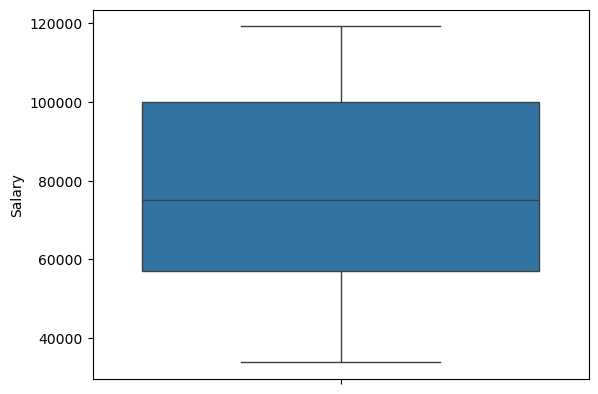

In [107]:
sns.boxplot(df['Salary'])

**observation**:
- There are no outliers in the given data, indicating that the values in the dataset fall within expected ranges
- min ,median, upper limit, lower limit calculated

**Histogram**

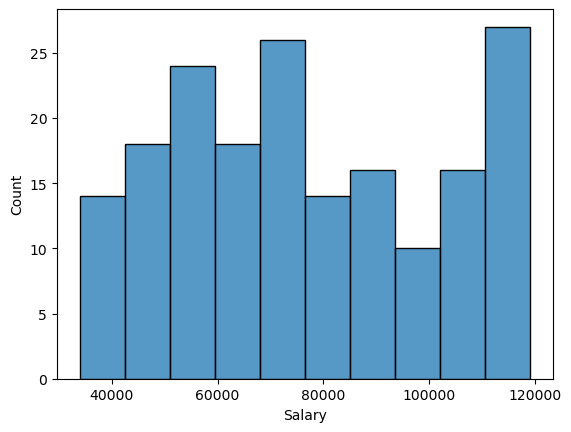

In [108]:
sns.histplot(df["Salary"], bins = 10)
plt.show()

**observation**:
- Frequency distribution 

**countplot for discrete variables**


<Axes: xlabel='Gender', ylabel='count'>

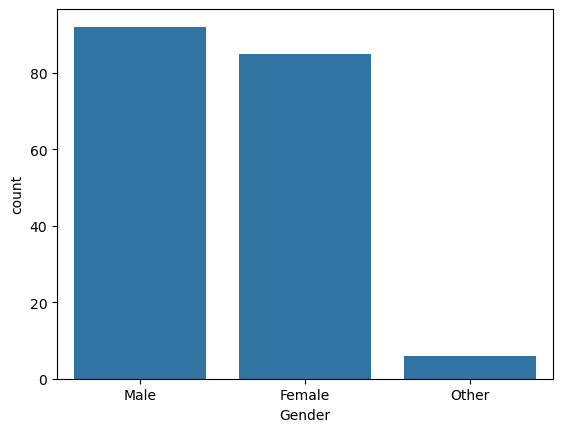

In [109]:
sns.countplot( x = df["Gender"])

**Observation**:
- Avg of males and females are more than other

<Axes: xlabel='Rating', ylabel='count'>

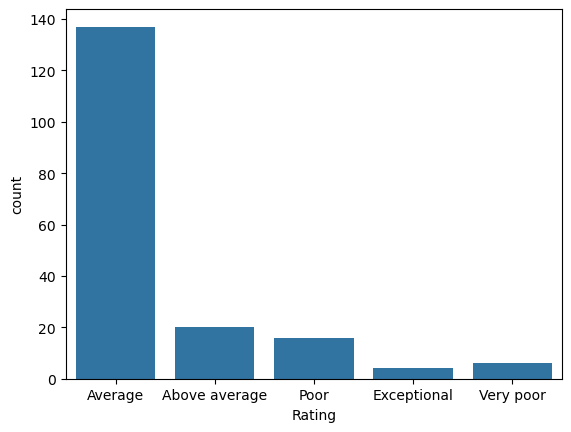

In [110]:
sns.countplot( x = df["Rating"])

**Observation**:
- Compared to other ratings, the average rating is higher, 
while lower ratings Exceptional

<Axes: xlabel='Department', ylabel='count'>

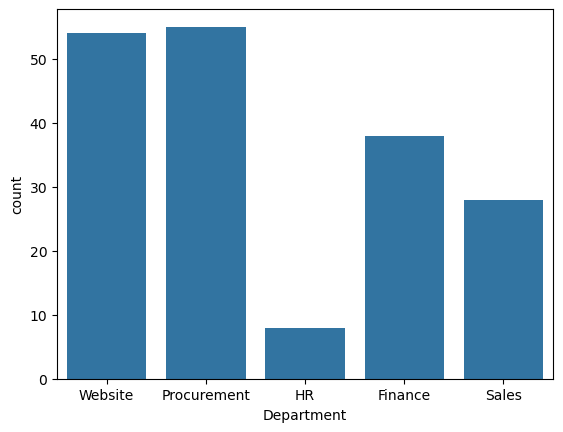

In [111]:
sns.countplot( x = df["Department"])

**Observation**:
- The frequency of the HR department is lower than other departments, while the Website and Procurement departments have nearly the same high frequency
- The Finance and Sales departments have moderate frequencies, with their counts lying between the higher frequency departments (such as Website and Procurement) and the lower frequency HR department.

<Axes: xlabel='Country', ylabel='count'>

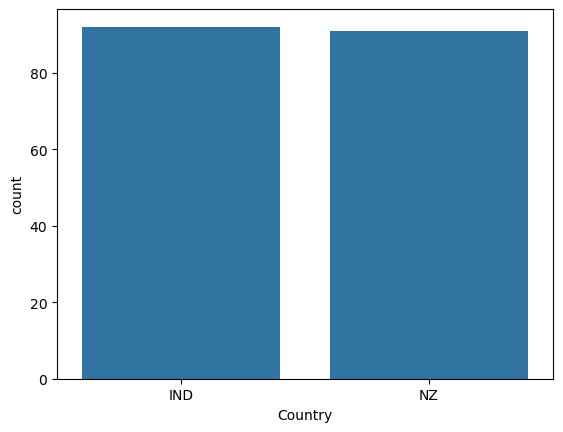

In [112]:
sns.countplot( x = df["Country"])

**observation**:
- A uniform or near-equal distribution of records between IND and NZ, since there seems to be a similar number of records for both countries in your dataset.
- If the distribution is not perfectly uniform, one country may have a slightly higher count, but overall, the records are relatively evenly spread between India (IND) and New Zealand (NZ).
- This implies that the data is well-balanced in terms of country representation.

# Step 3 : Data Preprocessing

**Data cleaning: Dimension Reduction**


**Remove unimportant_values column**

In [113]:
df = df.drop(columns = ["Name"])
df

,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Male,20,Average,2020-10-18,Website,112650,IND
1,Male,32,Above average,2021-04-07,Website,43840,IND
2,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Male,32,Average,2021-05-23,HR,45510,IND
4,Female,37,Poor,2020-09-11,Finance,115440,IND
...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ
179,Male,33,Average,2021-07-08,Sales,74550,NZ
180,Male,30,Average,2022-05-20,Procurement,67950,NZ
181,Male,42,Poor,2022-06-19,Finance,70270,NZ


**Observation:**

- Removing that column which contains unique values they are 
non-informative for analysis or modeling purposes.

In [114]:
df

,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Male,20,Average,2020-10-18,Website,112650,IND
1,Male,32,Above average,2021-04-07,Website,43840,IND
2,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Male,32,Average,2021-05-23,HR,45510,IND
4,Female,37,Poor,2020-09-11,Finance,115440,IND
...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ
179,Male,33,Average,2021-07-08,Sales,74550,NZ
180,Male,30,Average,2022-05-20,Procurement,67950,NZ
181,Male,42,Poor,2022-06-19,Finance,70270,NZ


# DATA ANALYSIS

**Q. count males and Females in dataset**

In [115]:
df["Gender"].value_counts()

Gender
Male      92
Female    85
Other      6
Name: count, dtype: int64

**observation**
- Compared to females, the number of males is slightly greater (92 males vs. 85 females).
- The number of others (6) is much less compared to both males and females.

**USING COUNTPLOT**

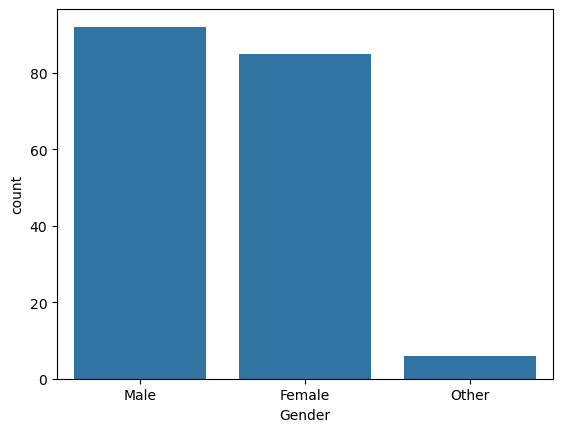

In [116]:
sns.countplot(x = df["Gender"])
plt.show()

**Observations**:
- The number of males is slightly greater than the number of females, and the number of individuals classified under 'Other' is relatively small.

**Q. what is Avg age for each gender**

In [117]:
df.groupby("Gender")["Age"].mean()

Gender
Female    31.294118
Male      29.739130
Other     30.333333
Name: Age, dtype: float64

**Observation**:
- Females: The average age of females is 31.29 years.
- Males: The average age of males is 29.74 years.
- Others: The average age of individuals classified as "Other" is 30.33 years

**USING BARPLOT**

<Axes: xlabel='Gender', ylabel='Age'>

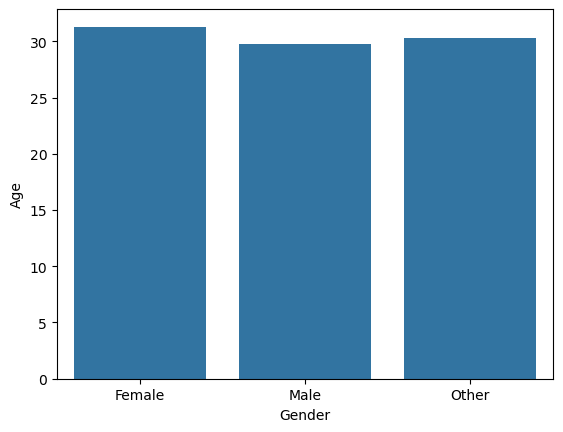

In [118]:
sns.barplot(df.groupby("Gender")["Age"].mean())

**Observation**
- on average, females are slightly older than both males and individuals in the "Other" category.
- nearly avg age above 25

**Q. What is count for Rating by Gender**

In [119]:
df.groupby("Rating")['Gender'].count()

Rating
Above average     20
Average          137
Exceptional        4
Poor              16
Very poor          6
Name: Gender, dtype: int64

**Observation**
- effectively showing how many individuals fall under each rating.

**Q. How many individuals of each gender fall under each rating category?**

In [120]:
df.groupby(["Gender", "Rating"]).size()


Gender  Rating       
Female  Above average     6
        Average          66
        Exceptional       4
        Poor              7
        Very poor         2
Male    Above average    12
        Average          68
        Poor              8
        Very poor         4
Other   Above average     2
        Average           3
        Poor              1
dtype: int64

**Observations**:
-  this helpful for understanding the distribution of ratings within gender groups.

**Using Unstacked plot**

<Axes: xlabel='Gender'>

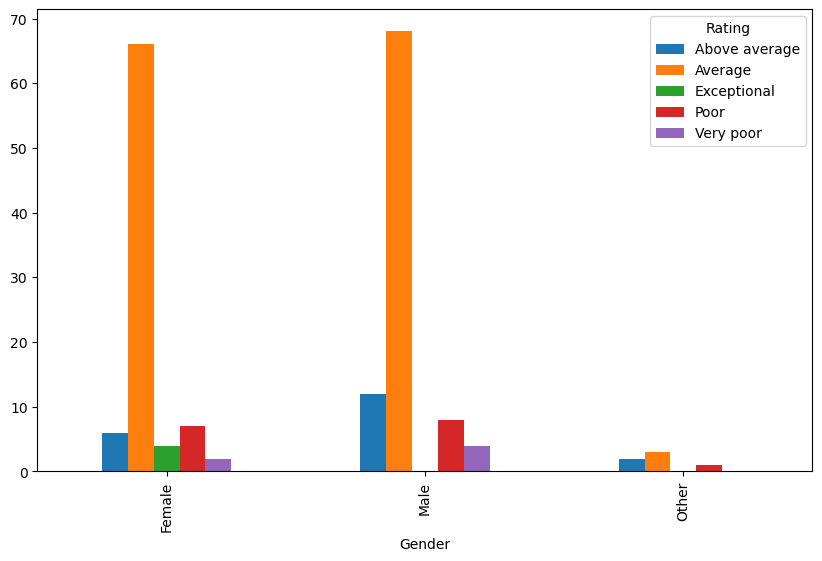

In [121]:
d = df.groupby(["Gender", "Rating"]).size().unstack()
d.plot(kind='bar', stacked=False, figsize=(10,6))


**Observation**:
- We can directly observe that ratings by females for the "Exceptional" category are present, whereas no ratings are given by males or individuals in the "Others" group for this category.
-  Additionally, no ratings are observed for the "Very Poor" category within the "Others" group.
-  Comparatively, the average ratings provided by males and females are higher than those given by individuals in the "Others" group.
-  Overall, the average rating is high across all groups.

**Find the gender distribution of employees who joined after 2021**

In [122]:
d = df[df['Date Joined'].dt.year > 2021]
d["Gender"].value_counts()

Gender
Male      33
Female    29
Other      2
Name: count, dtype: int64

**Observation**:
-The gender distribution of employees who joined after 2021 shows a fairly balanced hiring trend between males (33 hires) 
and females (29 hires), with a slight male majority ,
while the "Other" gender category remains minimally represented with only 2 hires.

**USING COUNT PLOT**

Text(0.5, 1.0, 'Gender Distribution of Employees Who Joined After 2021')

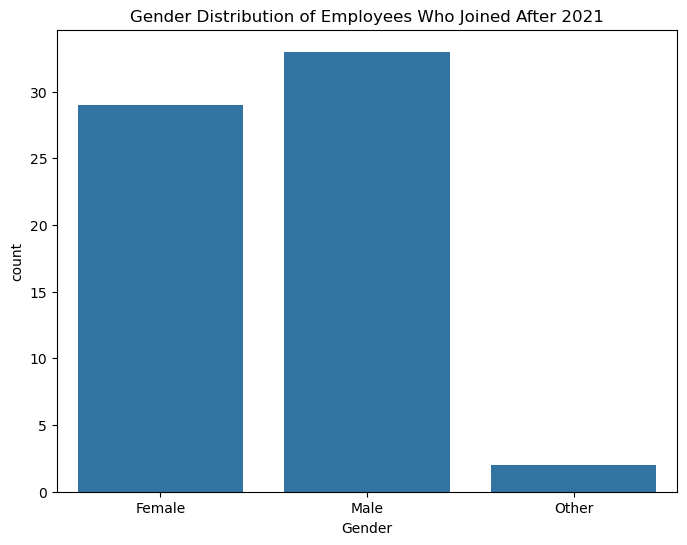

In [123]:
plt.figure(figsize=(8, 6))
sns.countplot(x=d['Gender'])
plt.title('Gender Distribution of Employees Who Joined After 2021')

**Observation**:
- As compared to Female And Other category joining of males are more
- less joining of Other categories as compared to Male And Female need to improve this

**What is the distribution of employees hired each year across different genders?**

In [124]:
df['Year Joined'] = df['Date Joined'].dt.year
pd.crosstab(df['Year Joined'], df['Gender'])


Gender,Female,Male,Other
Year Joined,,,
2020,18,18,1
2021,38,41,3
2022,27,33,2
2023,2,0,0


**Observation**:
- Gender Inclusivity: While male and female hiring is relatively balanced, the "Other" category requires significant improvement for better inclusivity.
- Declining Trend: The sharp decline in 2023 could indicate hiring freezes or changes in organizational priorities.
- Peak Year: 2021 stands out as a year of strong hiring for all genders

**Avg Salary for male and Females and other**

In [125]:
df.groupby("Gender")['Salary'].mean()


Gender
Female    79965.764706
Male      74016.847826
Other     86025.000000
Name: Salary, dtype: float64

**Observation**:
- avg salary The average salary for "Other" gender is the highest at 86,025, followed by "Female" at 79,965, and "Male" with the lowest average salary of 74,017.

In [126]:
df

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Year Joined
0,Male,20,Average,2020-10-18,Website,112650,IND,2020
1,Male,32,Above average,2021-04-07,Website,43840,IND,2021
2,Female,31,Average,2022-04-12,Procurement,103550,IND,2022
3,Male,32,Average,2021-05-23,HR,45510,IND,2021
4,Female,37,Poor,2020-09-11,Finance,115440,IND,2020
...,...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ,2021
179,Male,33,Average,2021-07-08,Sales,74550,NZ,2021
180,Male,30,Average,2022-05-20,Procurement,67950,NZ,2022
181,Male,42,Poor,2022-06-19,Finance,70270,NZ,2022


**How are the salaries distributed across different ranges?**

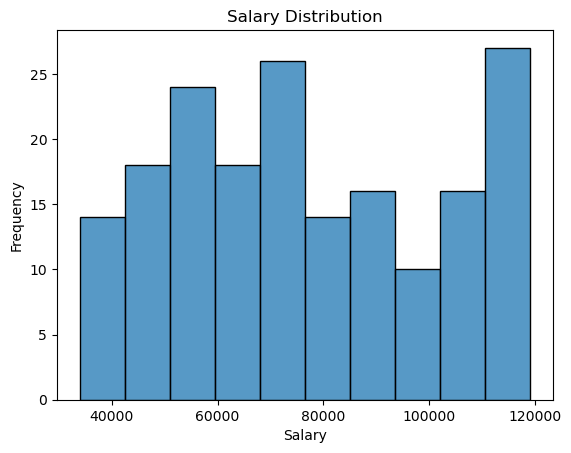

In [127]:
sns.histplot(df["Salary"], bins = 10)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

**Observation**:
- The histogram  displays the frequency of salaries falling within each salary range.

**Are there any noticeable skewness or outliers in the salary distribution?**

In [128]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')
outliers

Number of outliers: 0


,Gender,Age,Rating,Date Joined,Department,Salary,Country,Year Joined


**Observation**:
- No outlier no skewness found in data

**Are there any multiple peaks in the salary distribution for different genders?**

Text(0, 0.5, 'Frequency')

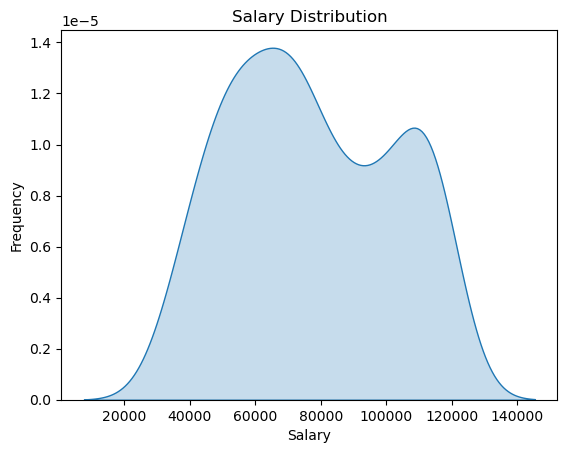

In [129]:
sns.kdeplot(data=df, x='Salary', fill=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

**Observation**:
- shows smooth salary distribution

In [130]:
df

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Year Joined
0,Male,20,Average,2020-10-18,Website,112650,IND,2020
1,Male,32,Above average,2021-04-07,Website,43840,IND,2021
2,Female,31,Average,2022-04-12,Procurement,103550,IND,2022
3,Male,32,Average,2021-05-23,HR,45510,IND,2021
4,Female,37,Poor,2020-09-11,Finance,115440,IND,2020
...,...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ,2021
179,Male,33,Average,2021-07-08,Sales,74550,NZ,2021
180,Male,30,Average,2022-05-20,Procurement,67950,NZ,2022
181,Male,42,Poor,2022-06-19,Finance,70270,NZ,2022


# USING PLOTS

**Histogram**

**What is the distribution of the ages of employees in the dataset?**

<Axes: xlabel='Age', ylabel='Count'>

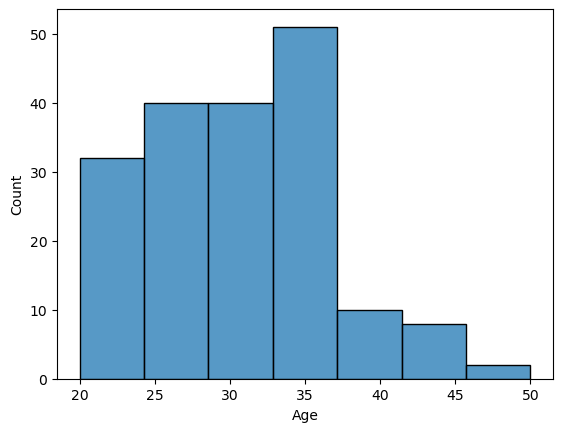

In [131]:
sns.histplot(df['Age'], bins = 7)

**How are salaries distributed across different salary ranges?**

In [132]:
bins = [0, 50000, 100000, 150000, 200000] 
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k']
df['Salary Range'] = pd.cut(df['Salary'], bins=bins, labels=labels)

# Get the count of employees in each salary range
salary_distribution = df['Salary Range'].value_counts().sort_index()

# Show the distribution
print(salary_distribution)


Salary Range
0-50k         32
50k-100k     106
100k-150k     45
150k-200k      0
Name: count, dtype: int64


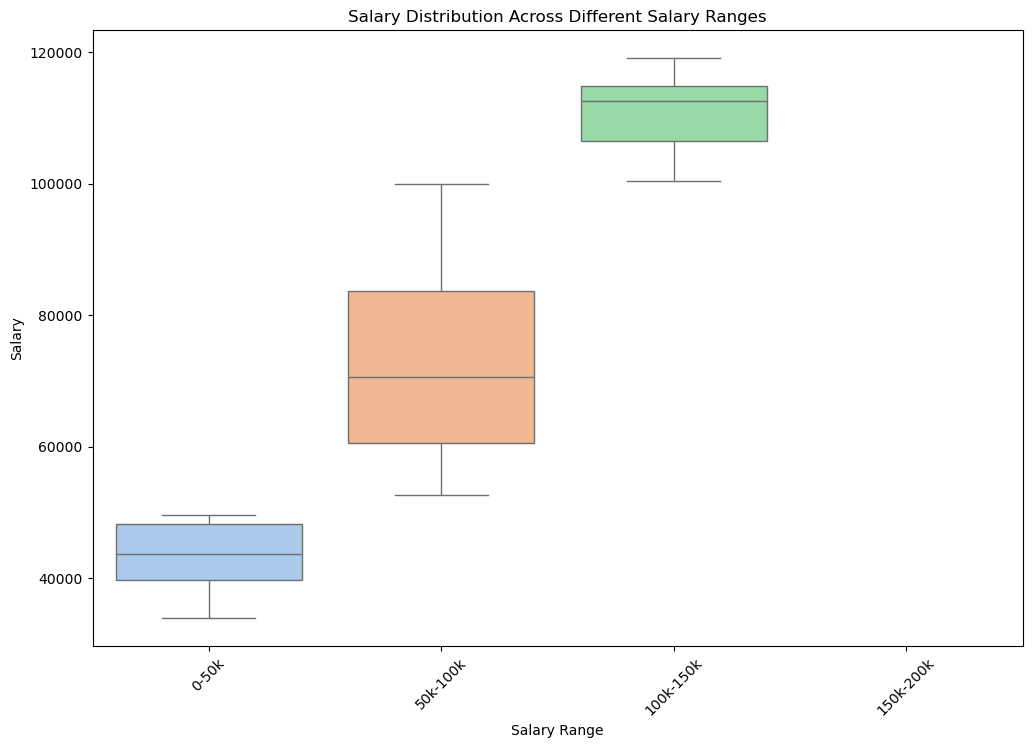

In [133]:
bins = [0, 50000, 100000, 150000, 200000] 
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k']
df['Salary Range'] = pd.cut(df['Salary'], bins=bins, labels=labels)
# Create a boxplot to show the salary distribution across different salary ranges
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary Range', y='Salary', data=df, palette='pastel') 
plt.title('Salary Distribution Across Different Salary Ranges') 
plt.xlabel('Salary Range') 
plt.ylabel('Salary') 
plt.xticks(rotation=45) 
plt.show()

**What is the frequency distribution of the number of employees joining each year?**

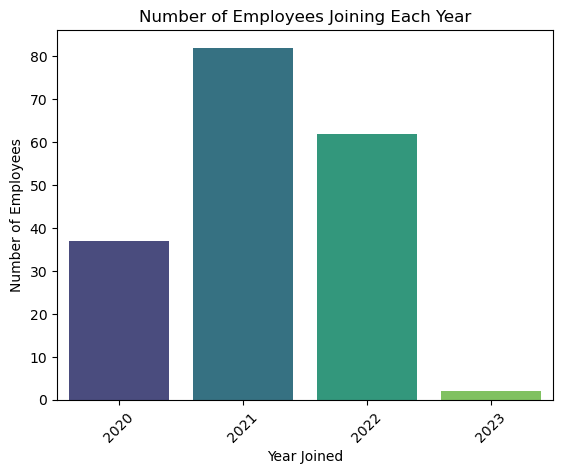

Year Joined
2020    37
2021    82
2022    62
2023     2
Name: count, dtype: int64


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of employees joining each year
year_joined_count = df['Year Joined'].value_counts().sort_index()

# Plot the frequency distribution
sns.barplot(x=year_joined_count.index, y=year_joined_count.values, palette='viridis')
plt.title('Number of Employees Joining Each Year')
plt.xlabel('Year Joined')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Display the frequency distribution
print(year_joined_count)


**KDE (Kernel Density Estimate)**

**What is the density distribution of salaries in the dataset?**


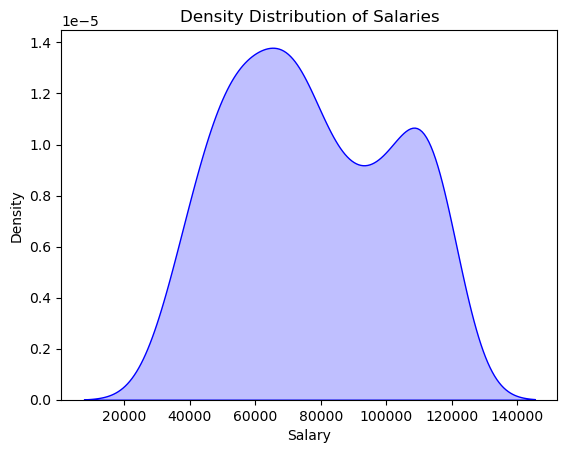

In [135]:
sns.kdeplot(df['Salary'], shade=True, color='blue') 
plt.title('Density Distribution of Salaries') 
plt.xlabel('Salary') 
plt.ylabel('Density') 
plt.show()

**How does the age distribution of employees look in a smooth density**

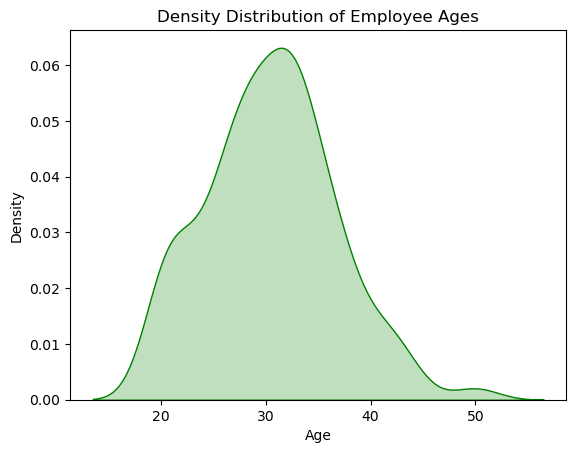

In [136]:
sns.kdeplot(df['Age'], shade=True, color='green') 
plt.title('Density Distribution of Employee Ages') 
plt.xlabel('Age') 

plt.ylabel('Density') 
plt.show()

**What are the density patterns for the different departments?**

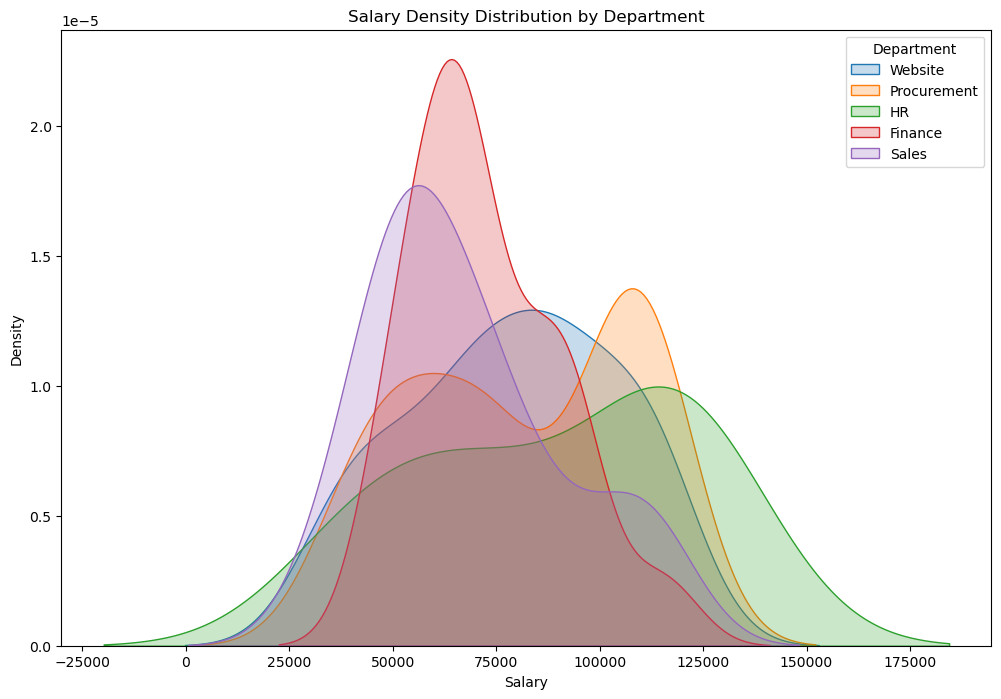

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
plt.figure(figsize=(12, 8))

# Iterate through each unique department and plot the KDE for their salaries
for department in df['Department'].unique():
    subset = df[df['Department'] == department]
    sns.kdeplot(subset['Salary'], shade=True, label=department)

# Customize the plot
plt.title('Salary Density Distribution by Department')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend(title='Department')
plt.show()


# **Boxplot**

  
**How do salaries vary across different departments?**



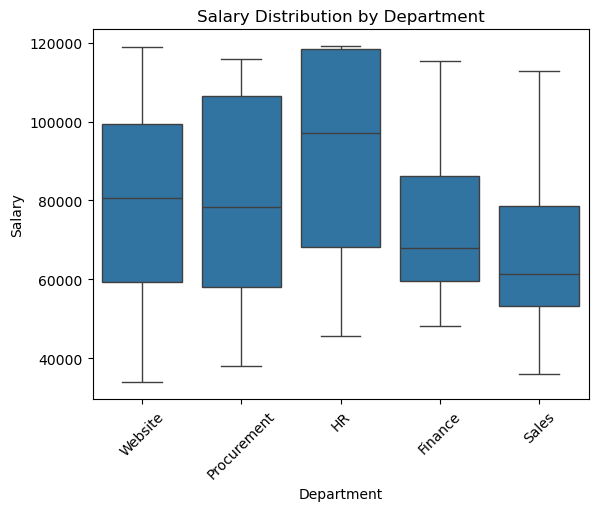

In [138]:
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department') 
plt.xlabel('Department') 
plt.ylabel('Salary') 
plt.xticks(rotation=45)
plt.show()

**What are the age distributions by gender?**

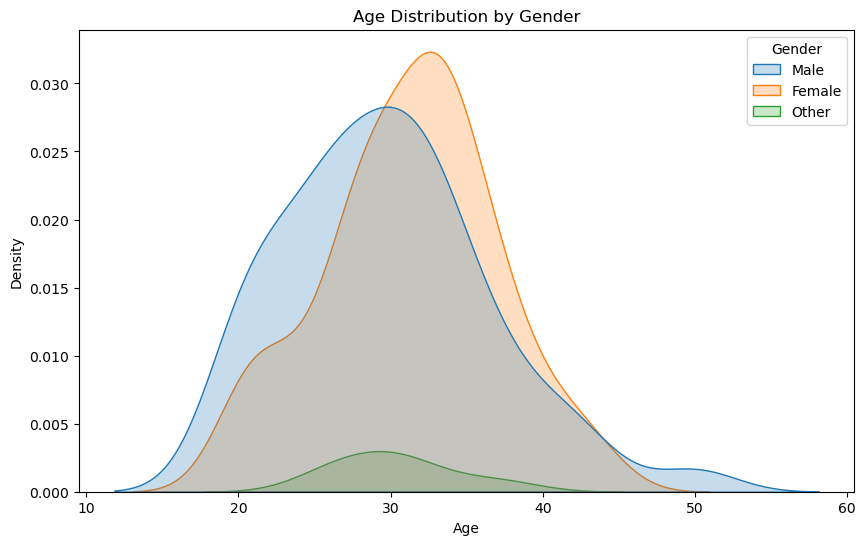

In [139]:
plt.figure(figsize=(10, 6)) 
sns.kdeplot(data=df, x='Age', hue='Gender', shade=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age') 
plt.ylabel('Density') 
plt.show()

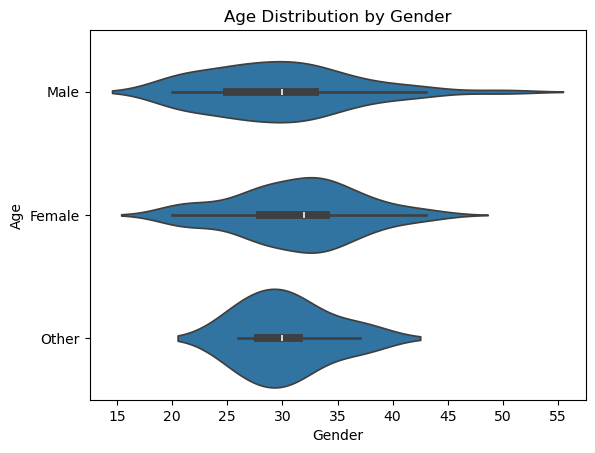

In [140]:
# Using Violin Plot
sns.violinplot(x='Age', y='Gender', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


**Are there any outliers in the salaries for different countries?**


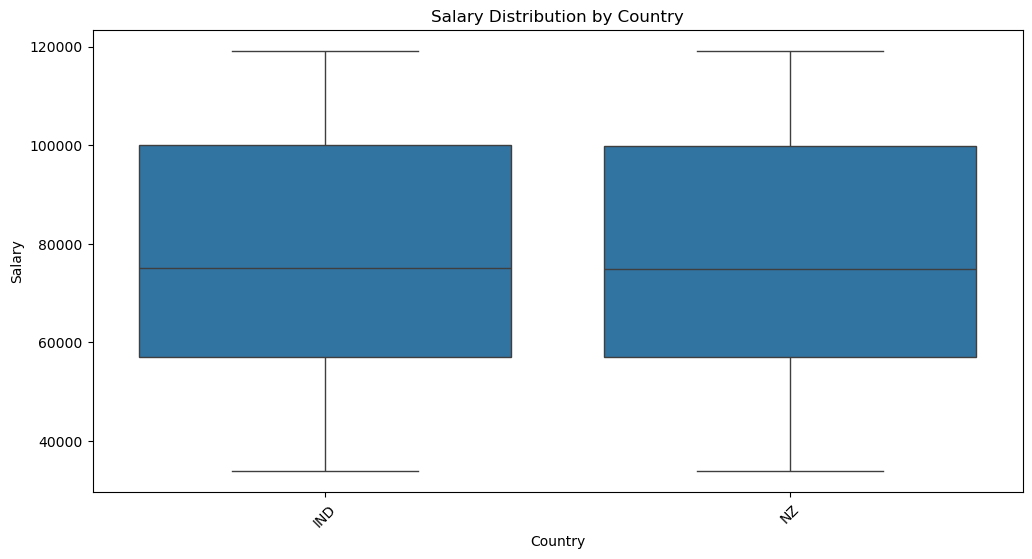

In [141]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Country', y='Salary', data=df) 
plt.title('Salary Distribution by Country') 

plt.xlabel('Country')
plt.ylabel('Salary') 
plt.xticks(rotation=45)
plt.show()

# Scatterplot
**
Is there a relationship between age and salary**?


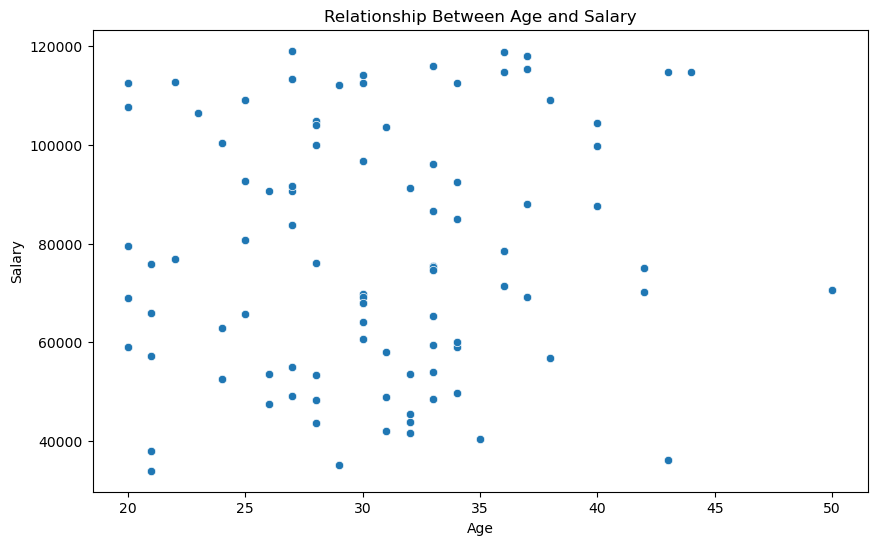

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df) 
plt.title('Relationship Between Age and Salary')
plt.xlabel('Age') 
plt.ylabel('Salary')
plt.show()

**How do years of experience correlate with performance ratings?**

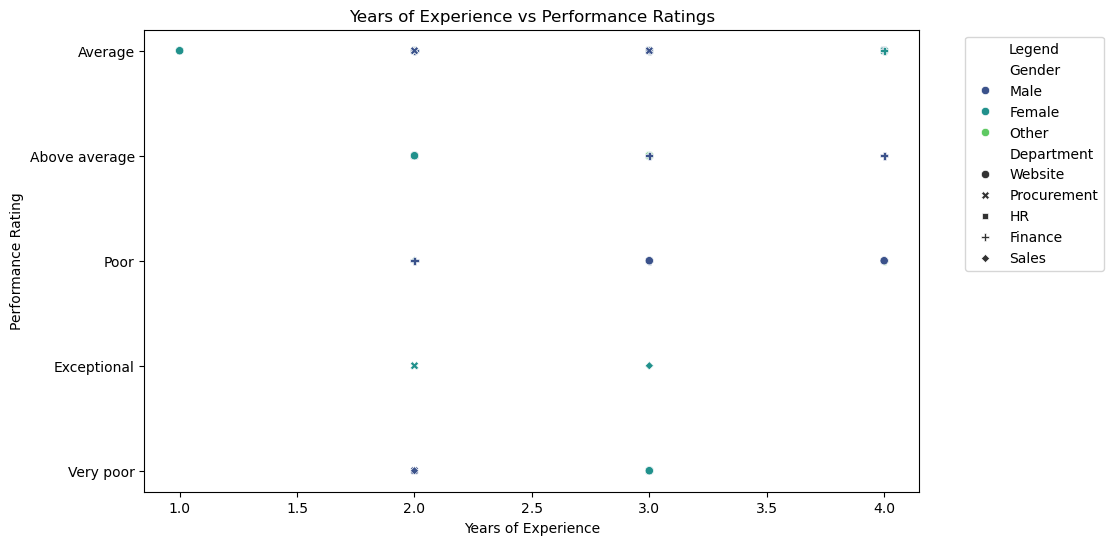

In [143]:
current_year = 2024 
# Calculate Years of Experience 
df['Years of Experience'] = current_year - df['Year Joined']
# Create a scatterplot to show the relationship between years of experience and performance ratings 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Years of Experience', y='Rating', data=df, hue='Gender', style='Department', palette='viridis')
plt.title('Years of Experience vs Performance Ratings') 
plt.xlabel('Years of Experience') 
plt.ylabel('Performance Rating')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Is there any pattern between the date joined and salary?**


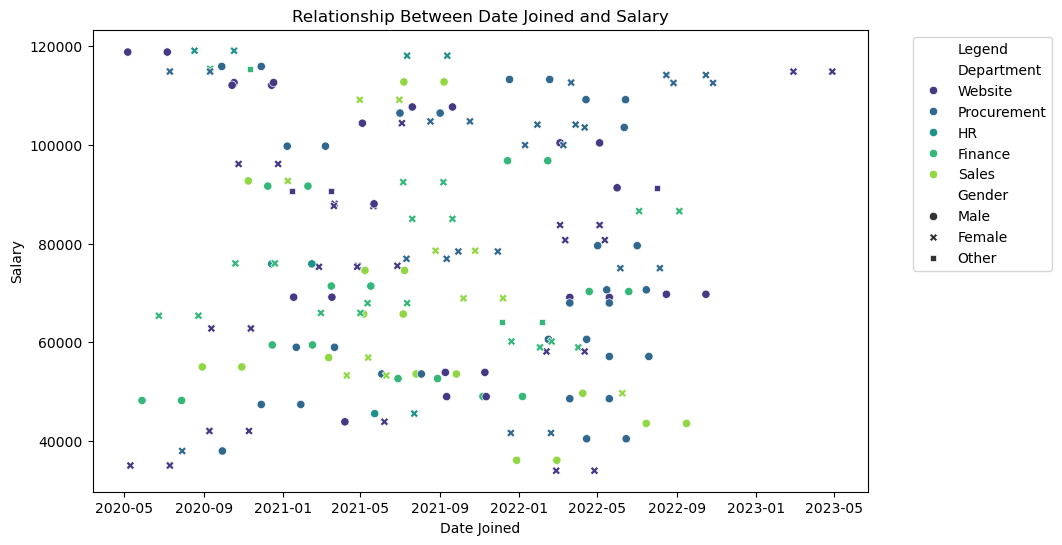

In [144]:


df['Date Joined'] = pd.to_datetime(df['Date Joined'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date Joined', y='Salary', data=df, hue='Department', palette='viridis', style='Gender') 
plt.title('Relationship Between Date Joined and Salary') 
plt.xlabel('Date Joined') 
plt.ylabel('Salary')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Lineplot


**How has the average salary changed over the years?**





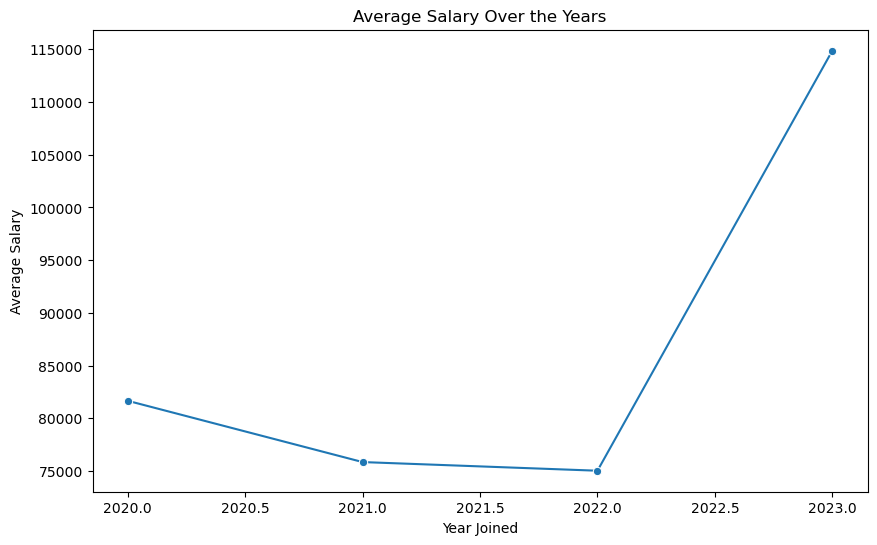

In [145]:
average_salary_by_year = df.groupby('Year Joined')['Salary'].mean().reset_index()
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Joined', y='Salary', data=average_salary_by_year, marker='o') 
plt.title('Average Salary Over the Years') 
plt.xlabel('Year Joined')
plt.ylabel('Average Salary') 
plt.show()

**What are the trends in the number of employees joining each year?**

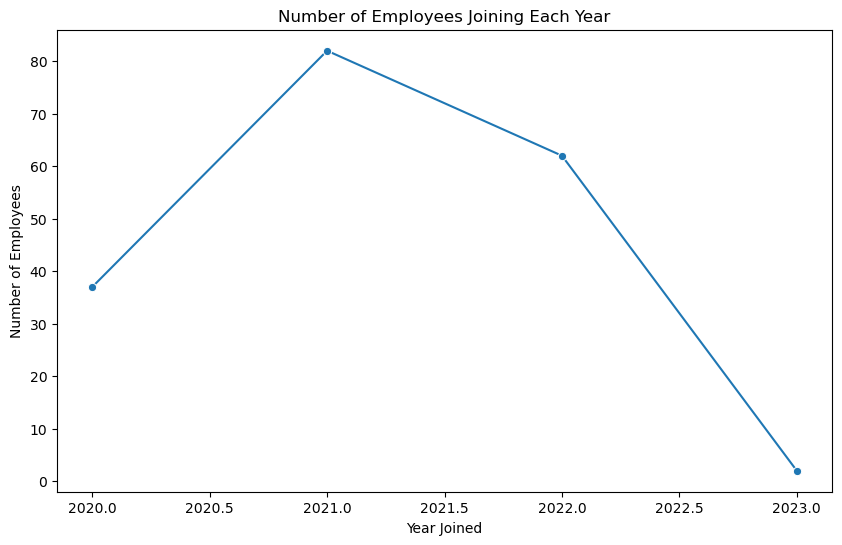

In [146]:
yearly_joined_count = df['Year Joined'].value_counts().sort_index().reset_index() 
yearly_joined_count.columns = ['Year Joined', 'Count']
plt.figure(figsize=(10, 6)) 
sns.lineplot(x='Year Joined', y='Count', data=yearly_joined_count, marker='o') 
plt.title('Number of Employees Joining Each Year')
plt.xlabel('Year Joined') 
plt.ylabel('Number of Employees') 
plt.show()

**How has the rating distribution evolved over time?**

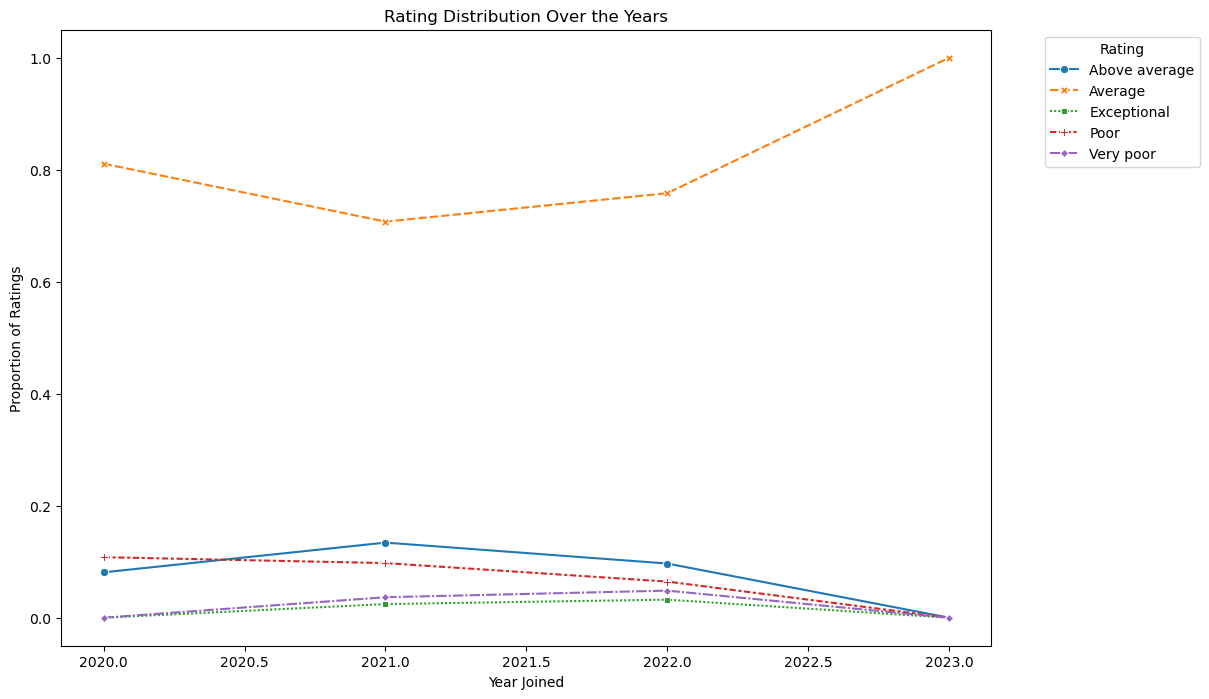

In [147]:
rating_distribution = pd.crosstab(df['Year Joined'], df['Rating'])
rating_distribution_normalized = rating_distribution.div(rating_distribution.sum(axis=1), axis=0)


plt.figure(figsize=(12, 8)) 
sns.lineplot(data=rating_distribution_normalized, markers=True)
plt.title('Rating Distribution Over the Years')
plt.xlabel('Year Joined')
plt.ylabel('Proportion of Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

# Joinplot


**How do age and salary compare in terms of joint distribution?**


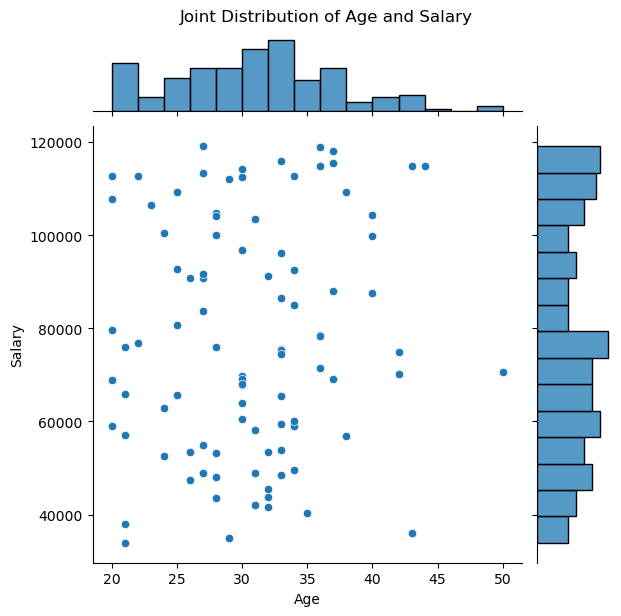

In [148]:
sns.jointplot(x='Age', y='Salary', data=df, kind='scatter', marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Joint Distribution of Age and Salary', y=1.02)
plt.xlabel('Age')
plt.ylabel('Salary') 
plt.show()

**What is the relationship between date joined and performance rating?**

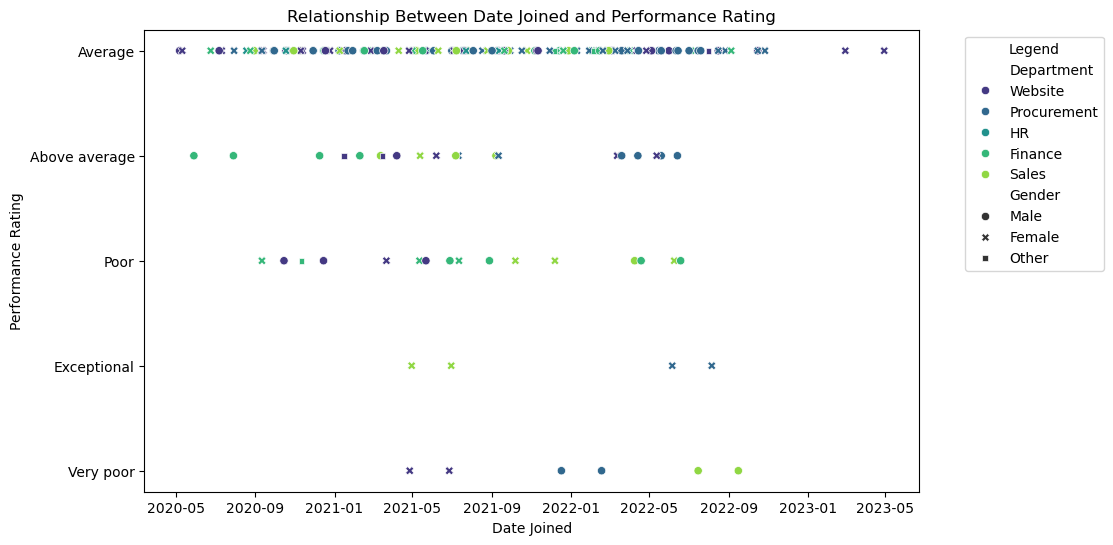

In [149]:
df['Date Joined'] = pd.to_datetime(df['Date Joined']) 
# Create a scatterplot to show the relationship between date joined and performance rating 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Date Joined', y='Rating', data=df, hue='Department', style='Gender', palette='viridis') 
plt.title('Relationship Between Date Joined and Performance Rating') 
plt.xlabel('Date Joined')
plt.ylabel('Performance Rating') 
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

**How do salary and date joined correlate visually in a combined plot?**


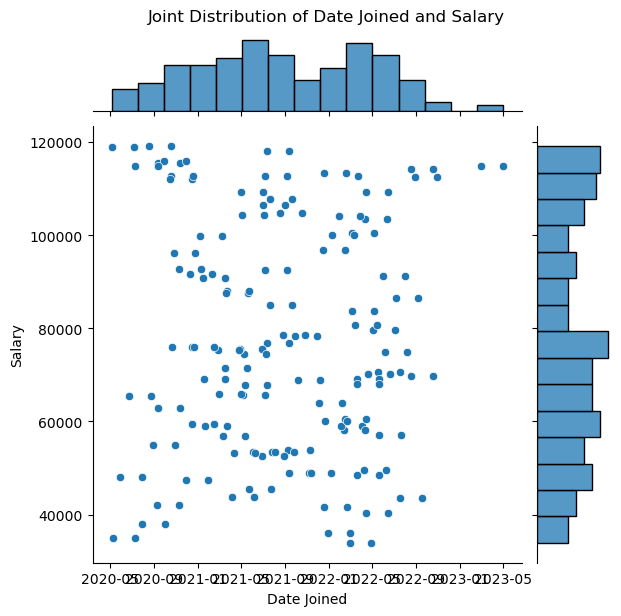

In [150]:


# Convert 'Date Joined' to datetime if it's not already
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Create a jointplot to show the joint distribution of date joined and salary
sns.jointplot(x='Date Joined', y='Salary', data=df, kind='scatter', marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Joint Distribution of Date Joined and Salary', y=1.02)
plt.xlabel('Date Joined')
plt.ylabel('Salary')
plt.show()


# Violinplot

**
What are the salary distributions for each department with KDE overlay**?


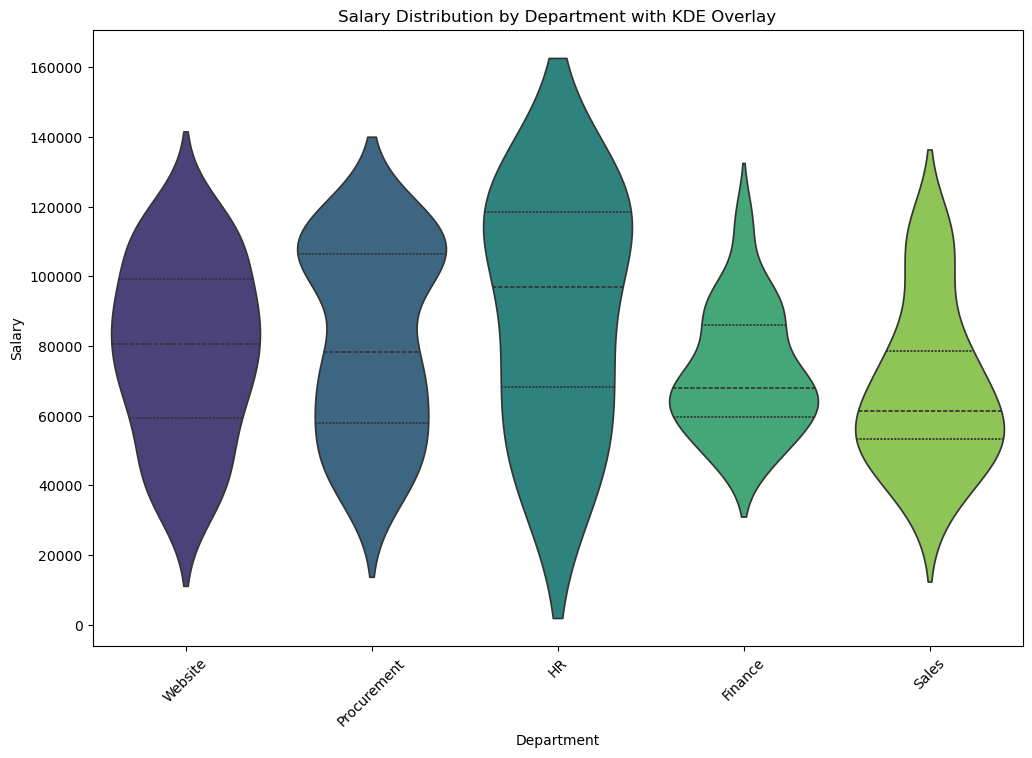

In [151]:


# Create a violin plot to show the salary distribution by department
plt.figure(figsize=(12, 8))
sns.violinplot(x='Department', y='Salary', data=df, inner='quartile', palette='viridis')
plt.title('Salary Distribution by Department with KDE Overlay')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


**How do the ages of employees vary by rating category?**


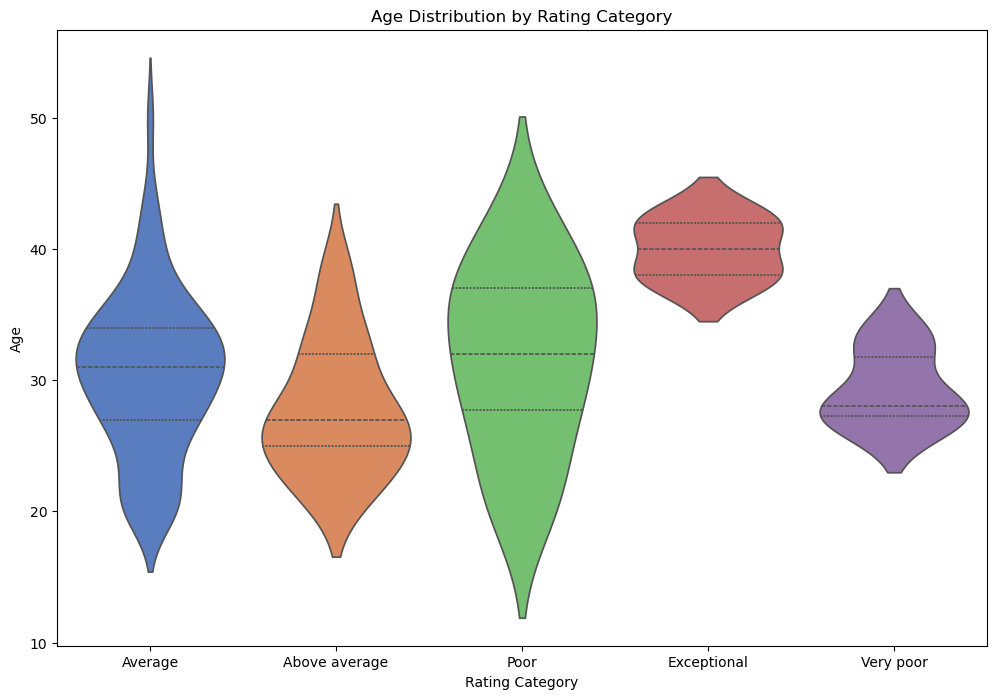

In [152]:


# Create a violin plot to show the age distribution by rating category
plt.figure(figsize=(12, 8))
sns.violinplot(x='Rating', y='Age', data=df, inner='quartile', palette='muted')
plt.title('Age Distribution by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Age')
plt.show()


**What does the distribution of salaries look like for different countries?**


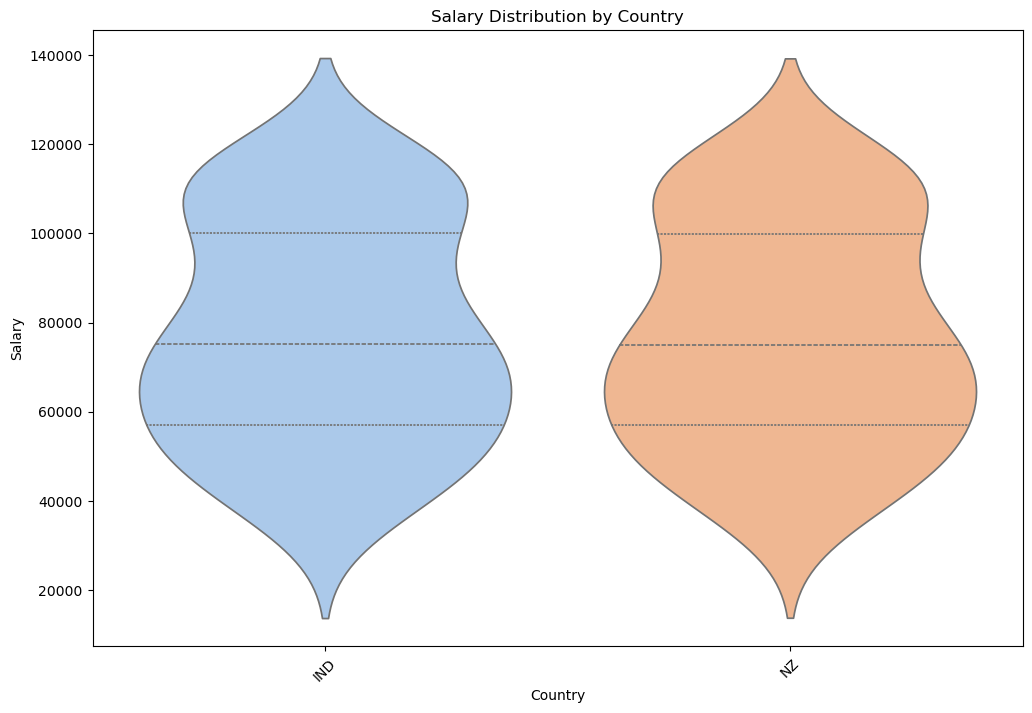

In [153]:


# Create a violin plot to show the salary distribution by country
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Salary', data=df, inner='quartile', palette='pastel')
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


# Pairplot
**What are the pairwise relationships between age, salary, and years of experience?**


<Figure size 1200x800 with 0 Axes>

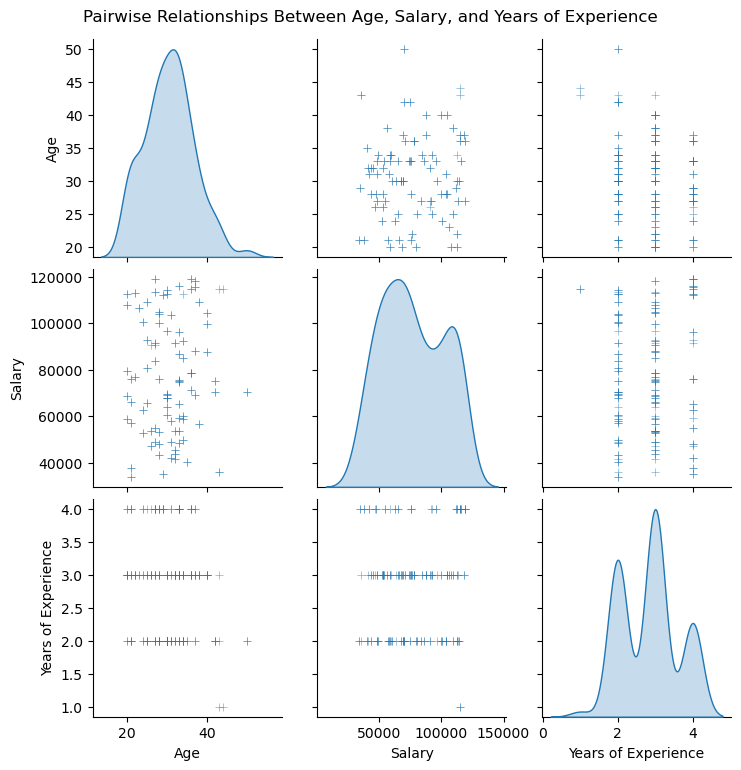

In [154]:


# Calculate Years of Experience
current_year = 2024
df['Years of Experience'] = current_year - df['Year Joined']

# Create a pairplot to show the pairwise relationships
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Age', 'Salary', 'Years of Experience']], diag_kind='kde', markers='+', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Age, Salary, and Years of Experience', y=1.02)
plt.show()


<Figure size 1200x800 with 0 Axes>

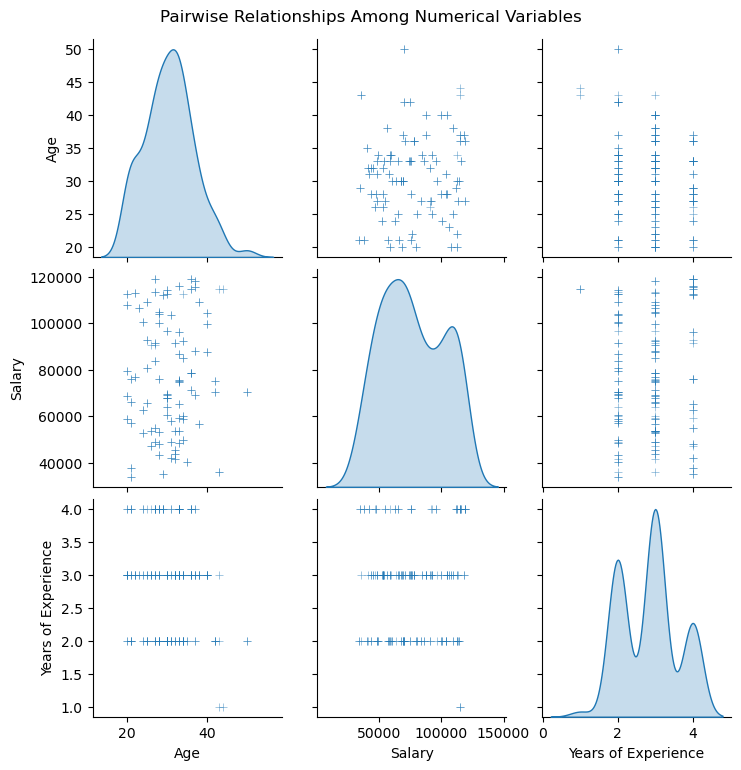

In [155]:
# How do different numerical variables interact with each other?


# Create a pairplot to show the pairwise relationships among all numerical variables
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Age', 'Salary', 'Years of Experience']], diag_kind='kde', markers='+', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Among Numerical Variables', y=1.02)
plt.show()


# Heatplot
**What is the correlation matrix for all numerical variables in the dataset?**



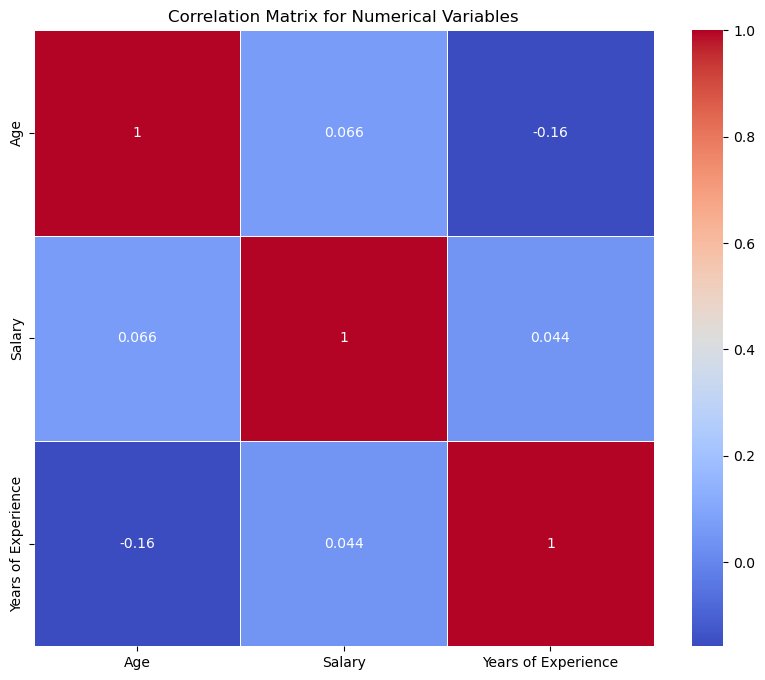

In [156]:

# Calculate Years of Experience
current_year = 2024
df['Years of Experience'] = current_year - df['Year Joined']

# Select only numerical columns
numerical_df = df[['Age', 'Salary', 'Years of Experience']]

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap to show the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


**How do different departments compare in terms of their average salaries?**

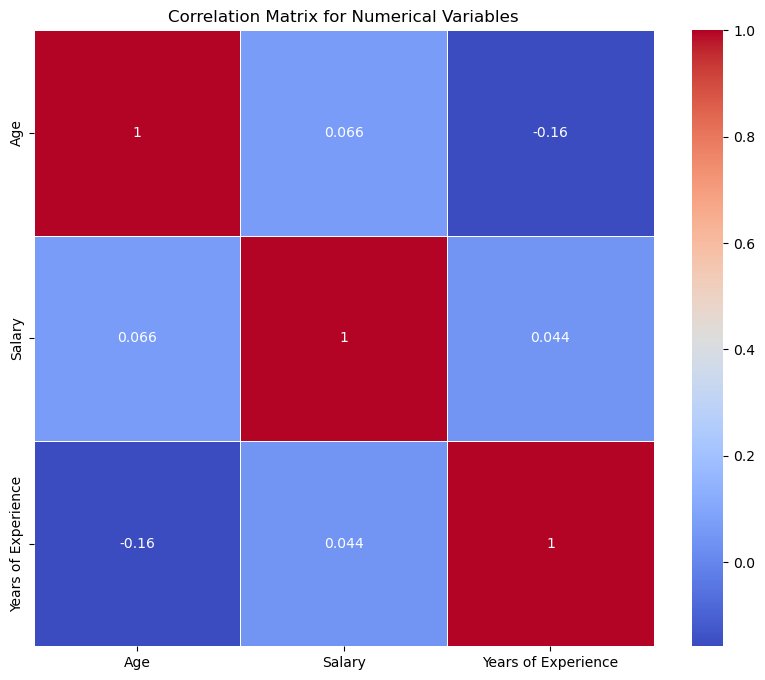

In [157]:

# Calculate Years of Experience
current_year = 2024
df['Years of Experience'] = current_year - df['Year Joined']

# Select only numerical columns
numerical_df = df[['Age', 'Salary', 'Years of Experience']]

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap to show the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


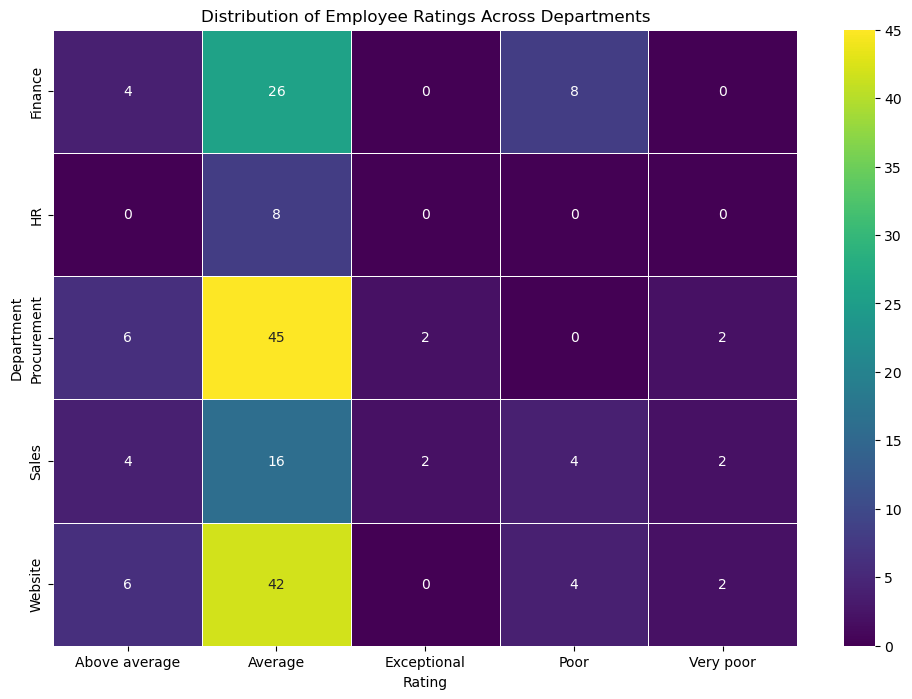

In [158]:

# Create a crosstab to count the number of each rating by department
rating_distribution = pd.crosstab(df['Department'], df['Rating'])

# Create a heatmap to show the distribution of ratings across departments
plt.figure(figsize=(12, 8))
sns.heatmap(rating_distribution, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Distribution of Employee Ratings Across Departments')
plt.xlabel('Rating')
plt.ylabel('Department')
plt.show()


# Barplot
**How many employees are there in each department?**



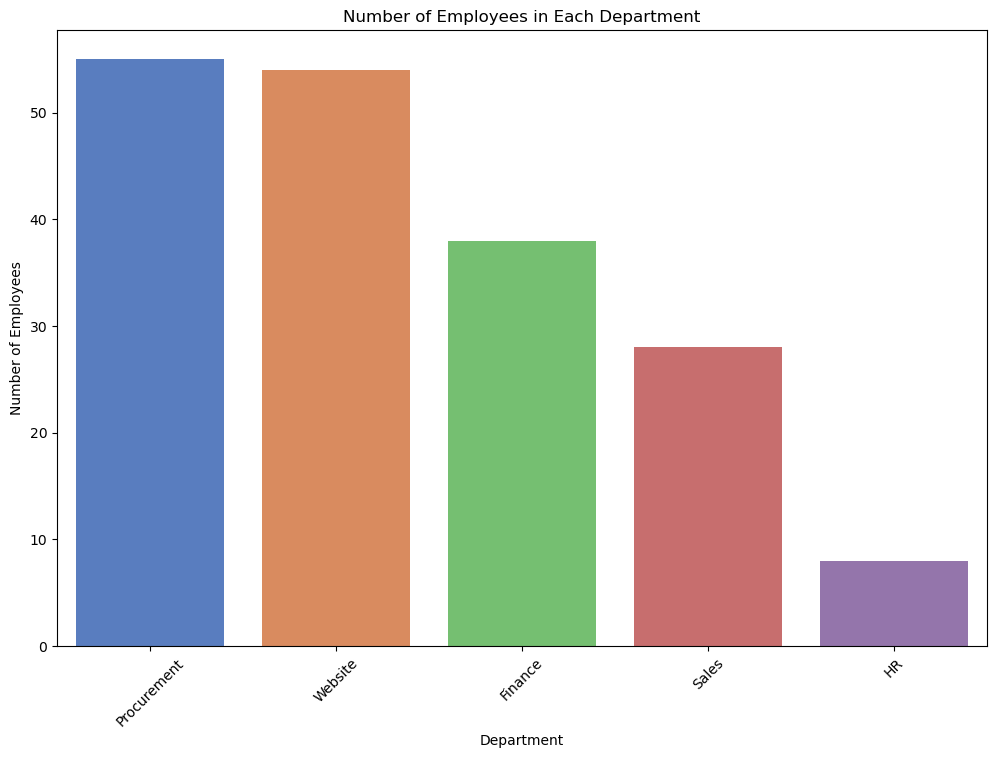

In [159]:



# Create a count of employees in each department
employee_count_by_department = df['Department'].value_counts().reset_index()
employee_count_by_department.columns = ['Department', 'Number of Employees']

# Create a bar plot to show the number of employees in each department
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='Number of Employees', data=employee_count_by_department, palette='muted')
plt.title('Number of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


# Pieplot
# What is the proportion of male to female employees?


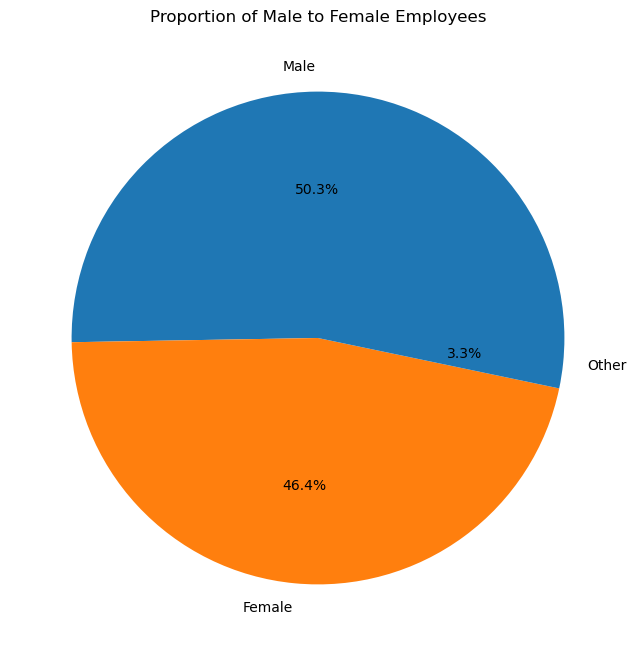

In [160]:


# Count the number of male and female employees
gender_counts = df['Gender'].value_counts()

# Create a pie chart to show the proportion of male to female employees
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Proportion of Male to Female Employees')
plt.show()


# Countplot
# How many employees joined each year?


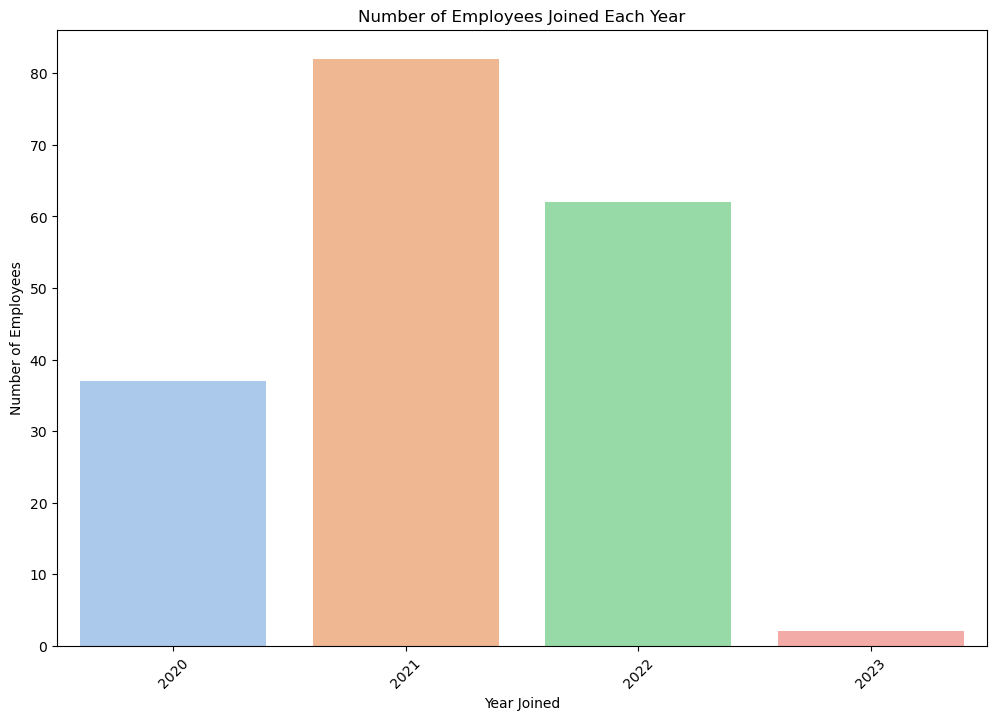

In [161]:



# Create a count plot to show the number of employees joined each year
plt.figure(figsize=(12, 8))
sns.countplot(x='Year Joined', data=df, palette='pastel')
plt.title('Number of Employees Joined Each Year')
plt.xlabel('Year Joined')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()
